In [ ]:
!pip install pulser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.18 requires requests>=2.26, but you have requests 2.25.1 which is incompatible.
tweepy 4.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pulser import Register, Sequence, Pulse
from pulser.devices import Chadoq2
from pulser.waveforms import BlackmanWaveform
from pulser_simulation import Simulation

In [ ]:
data = []
distances = np.linspace(6.5, 14, 7)

In [ ]:
r = [1, 0]  # |r>
rr = np.kron(r,r)  # |rr> 

In [ ]:
print(rr)

[1 0 0 0]


In [ ]:
occup = [np.outer(rr, np.conj(rr))]  # |rr><rr|

In [ ]:
print(occup)

[array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])]


In [ ]:
amp_wf = BlackmanWaveform(1000, np.pi)
pi_pulse = Pulse.ConstantDetuning(amp_wf, 0, 0)

In [ ]:
for i, R in enumerate(distances):

  reg = Register.rectangle(1, 2, spacing=R, prefix='atom')
  
  seq = Sequence(reg, Chadoq2)
  seq.declare_channel('ryd', 'rydberg_local', initial_target='atom0')

  seq.add(pi_pulse, 'ryd')
  seq.target('atom1', 'ryd')
  seq.add(pi_pulse, 'ryd')

  sim = Simulation(seq)
  res = sim.run()

  data.append(res.expect(occup)[0])

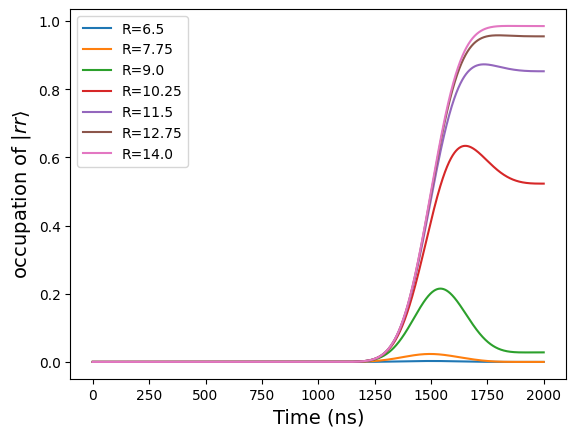

In [ ]:
for i, R in enumerate(distances):

  plt.plot(data[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"occupation of $|rr\rangle$", fontsize=14)
  plt.legend()

In [ ]:
Chadoq2.rydberg_blockade_radius(np.pi)  # comparing with actual blockade radius 

10.951586037372621